In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
from Scores import *
from create_dataframe import * 
from create_dataframe_regression import * 
import time 

In [14]:
df = pd.read_csv("dataframe_regression.csv")
df


Unnamed: 0  sender_id  receiver_id  receveur_potentiel  passe  \
0                0         26           18                   1      0   
1                1         11           14                   1      0   
2                2          4           10                   1      0   
3                3         12            7                   1      0   
4                4         15           24                   1      0   
5                5         26           18                   1      0   
6                6          2            1                   1      1   
7                7         26           18                   1      0   
8                8         14            7                   1      0   
9                9         18           21                   1      0   
10              10         14           10                   1      0   
11              11         10            9                   1      0   
12              12         16           18                   1      0   
13              13         18           21                   1      0   
14              14          2            4                   1      0   
15              15         25           18                   1      0   
16              16          3            5                   1      0   
17              17         24           25                   1      0   
18              18          4            8                   1      0   
19              19         21           20                   1      0   
20              20         27           18                   1      0   
21              21         22           18                   1      0   
22              22          9           12                   1      0   
23              23         13            3                   1      0   
24              24         28           26                   1      0   
25              25         23           16                   1      0   
26              26         23           15                   1      1   
27              27         21           23                   1      0   
28              28         18           20                   1      0   
29              29          2            4                   1      0   
...            ...        ...          ...                 ...    ...   
140516      140516         17           27                  14      0   
140517      140517         25           18                  14      0   
140518      140518          3            8                  14      0   
140519      140519          6            8                  14      0   
140520      140520          8           13                  14      0   
140521      140521         15           26                  14      0   
140522      140522          6            7                  14      0   
140523      140523          5           11                  14      0   
140524      140524          3            1                  14      0   
140525      140525         24           18                  14      0   
140526      140526         23           24                  14      0   
140527      140527          2            4                  14      0   
140528      140528         23           27                  14      0   
140529      140529         27           20                  14      0   
140530      140530         13            2                  14      0   
140531      140531         20           15                  14      0   
140532      140532          3            5                  14      0   
140533      140533         24           20                  14      0   
140534      140534         10            3                  14      0   
140535      140535          5            8                  14      0   
140536      140536         14           10                  14      0   
140537      140537         11           12                  14      0   
140538      140538         25           22                  14    

In [15]:
print(np.sum(df['passe']))
PasseFaite=df[df['passe']==1]
PassePasFaite=df[df['passe']==0]


10039


In [16]:
np.sum(PasseFaite['adversaire_dans_cone'])

3162

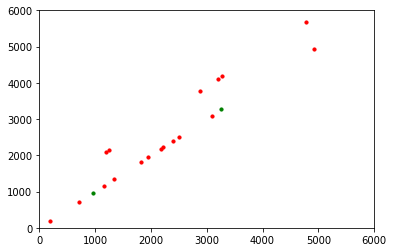

In [17]:
plt.scatter(PasseFaite['score1_distance'][PasseFaite['passe_id']<3],PasseFaite['score2'][PasseFaite['passe_id']<3],color='green',s=10)
plt.scatter(PassePasFaite['score1_distance'][PassePasFaite['passe_id']<3],PassePasFaite['score2'][PassePasFaite['passe_id']<3],color='red',s=10)
plt.xlim(0,6000)
plt.ylim(0,6000)
plt.show()

In [18]:
import sklearn
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df
y=df['passe']
dfACP=df.drop(columns=['adversaire_dans_cone','sender_id','receiver_id','passe','passe_id','receveur_potentiel'])
#,'sender_id','receiver_id','passe','passe_id','receveur_potentiel'
#dfACP


In [49]:
dfACP

score1_distance         score2         score3         score4  \
0           2392.822601    2392.822601    2392.822601    2626.822601   
1           1198.540779    2098.540779    2098.540779    1777.540779   
2           1290.155029    2190.155029    2190.155029    2184.155029   
3            600.083328    1500.083328    1500.083328    1428.083328   
4         100000.000000  100000.000000  100000.000000  100000.000000   
5           7481.797912    7481.797912    7481.797912    8228.797912   
6           1218.277472    1218.277472    1218.277472     975.277472   
7           5307.522963    5307.522963    5307.522963    5814.522963   
8           3259.831284    3259.831284    3259.831284    3031.831284   
9           2875.621672    2875.621672    2875.621672    2989.621672   
10          1004.987562    1004.987562    1004.987562     974.987562   
11          3004.080558    3904.080558    3904.080558    3986.080558   
12          1211.486690    1211.486690    1211.486690    1088.486690   
13           514.003891    1414.003891    1414.003891    1445.003891   
14          1033.924562    1933.924562    1933.924562    2036.924562   
15          3815.783013    3815.783013    3815.783013    3752.783013   
16          1131.591799    2031.591799    2086.591799    2149.591799   
17          2597.248544    3497.248544    3552.248544    3024.248544   
18          2360.275408    2360.275408    2360.275408    2201.275408   
19        141099.659107  141999.659107  142054.659107  111493.659107   
20           930.053762     930.053762     930.053762    1023.053762   
21          4125.348470    4125.348470    4125.348470    4533.348470   
22          1866.252930    1866.252930    1866.252930    1656.252930   
23          2962.330164    3862.330164    3862.330164    4139.330164   
24          2503.437637    2503.437637    2503.437637    2335.437637   
25          2410.186715    2410.186715    2410.186715    1969.186715   
26          1252.557384    1252.557384    1252.557384    1337.557384   
27          2615.989297    3515.989297    3515.989297    3020.989297   
28          1533.949152    2433.949152    2488.949152    2641.949152   
29        144218.700937  145118.700937  145173.700937  114816.700937   
...                 ...            ...            ...            ...   
140516    142632.226723  143532.226723  143587.226723  113182.226723   
140517      2634.103263    3534.103263    3589.103263    3825.103263   
140518      1507.481343    2407.481343    2462.481343    2129.481343   
140519      4743.216208    5643.216208    5643.216208    5777.216208   
140520    143707.943065  144607.943065  144662.943065  114362.943065   
140521      2397.540406    3297.540406    3297.540406    2580.540406   
140522      1993.614807    1993.614807    1993.614807    1606.614807   
140523    140909.744872  141809.744872  141864.744872  111057.744872   
140524    139057.664658  139957.664658  140012.664658  111167.664658   
140525    143306.907370  144206.907370  144261.907370  154200.907370   
140526      3912.556709    4812.556709    4812.556709    4887.556709   
140527      2715.529414    3615.529414    3615.529414    3861.529414   
140528    143118.549462  144018.549462  144073.549462  113755.549462   
140529    143456.594829  144356.594829  144411.594829  114576.594829   
140530    141783.315309  142683.315309  142738.315309  112792.315309   
140531    142276.227811  143176.227811  143231.227811  153196.227811   
140532      3868.656097    3868.656097    3868.656097    3064.656097   
140533    141534.550552  142434.550552  142489.550552  112492.550552   
140534    144698.988248  145598.988248  145653.988248  155759.988248   
140535    145600.736605  146500.736605  146555.736605  156874.736605   
140536    100000.000000  100000.000000  100000.000000  100000.000000   
140537      3856.241694    4756.241694    4756.241694    5091.241694   
140538    139838.469671  140738.469671  140793.469671  111243.469671   
140539      1480.033783    2380.033783    2380.0

In [19]:
Z=sc.fit_transform(dfACP)
print(np.mean(Z,axis=0))
print(np.std(Z,axis=0,ddof=0))

[ 5.17692258e-17  2.10312480e-17 -2.42668246e-17  4.85336492e-17
 -1.86045655e-17 -1.18098546e-16  1.05156240e-16 -4.85652466e-16
 -1.69968884e-16 -1.76945596e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [20]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation

acp = PCA(svd_solver='full',n_components=2)
coord = acp.fit_transform(Z)
#proportion de variance expliquée
print(acp.explained_variance_ratio_)
principalDf = pd.DataFrame(data = coord
             , columns = ['principal component 1', 'principal component 2'])
principalDf['passe']=y


[0.49007562 0.17484839]


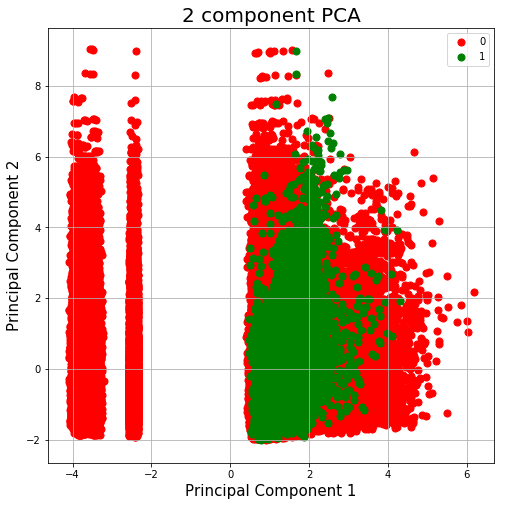

In [21]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['passe'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()